In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_theme()


In [12]:
#loading the data
df = pd.read_csv("../data/raw/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.shape

(284807, 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df["Class"].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
df["Class"].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Class Imbalance Observation
The dataset is extremely imbalanced: fraudulent transactions account for only 492 out of 284,807 transactions (~0.17%).
Because of this, a naive model that predicts every transaction as non-fraudulent would still achieve over 99.8% accuracy, while completely failing to detect fraud.
As a result, accuracy is not an appropriate evaluation metric for this problem. Instead, metrics that focus on the minority class—such as precision, recall, and PR-AUC—are more suitable. The severe imbalance also implies that special modeling strategies (e.g., resampling or cost-sensitive learning) will be required to effectively identify fraudulent transactions.

In [17]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

Text(0.5, 0, 'Amount')

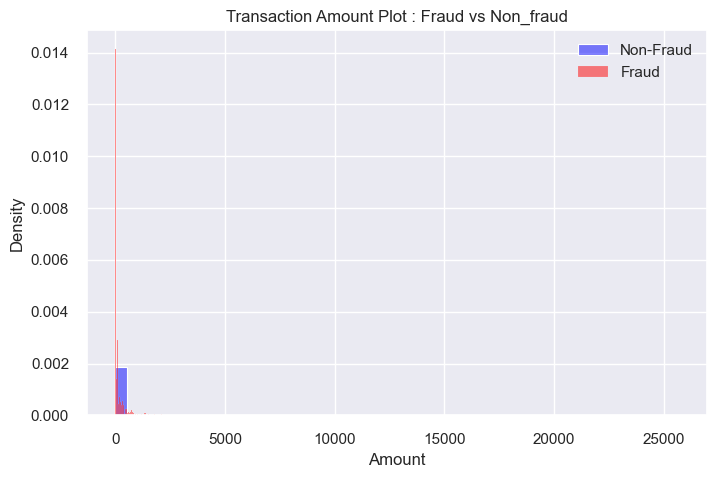

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(non_fraud['Amount'], bins =50, color='blue', label='Non-Fraud', stat='density', alpha=0.5)
sns.histplot(fraud['Amount'], bins=50, color ='red',label = 'Fraud', stat= 'density', alpha = 0.5)
plt.legend()
plt.title('Transaction Amount Plot : Fraud vs Non_fraud')
plt.xlabel('Amount')


<Axes: xlabel='Amount', ylabel='Density'>

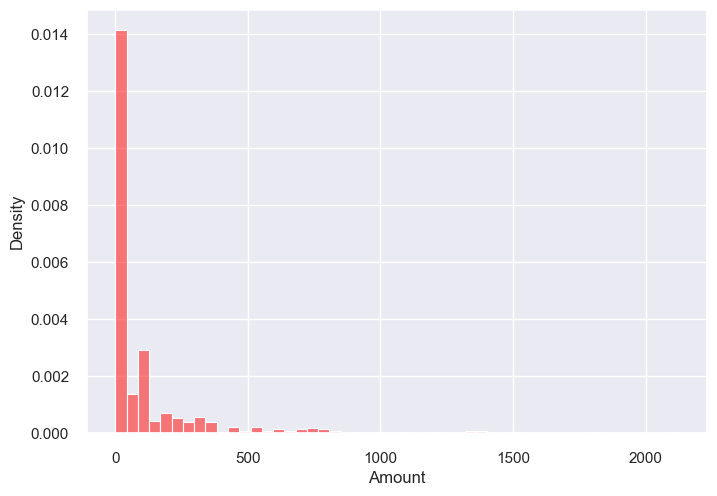

In [19]:
sns.histplot(fraud['Amount'], bins=50, color ='red',label = 'Fraud', stat= 'density', alpha = 0.5)

<Axes: xlabel='Amount', ylabel='Density'>

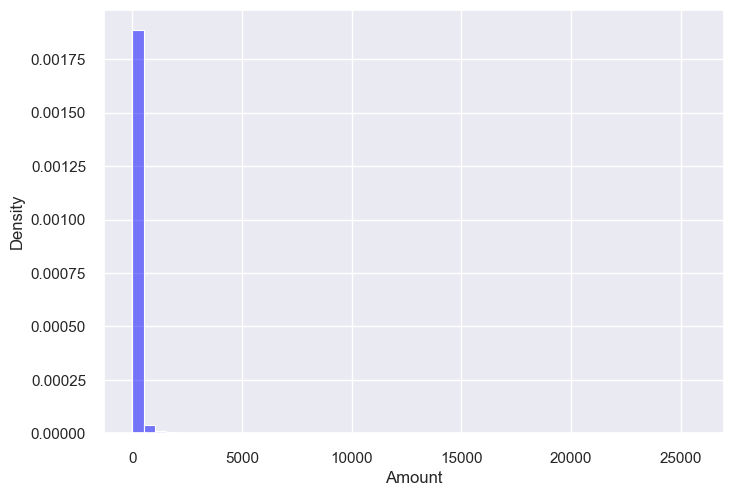

In [20]:
sns.histplot(non_fraud['Amount'], bins =50, color='blue', label='Non-Fraud', stat='density', alpha=0.5)

Fraudulent transactions are heavily concentrated at small transaction amounts and decline rapidly as the amount increases.
In contrast, non-fraudulent transactions are distributed across a much wider range of values, including large amounts.
This difference in distribution indicates that transaction amount is a useful feature for fraud detection.

In [21]:
df.groupby("Class")['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


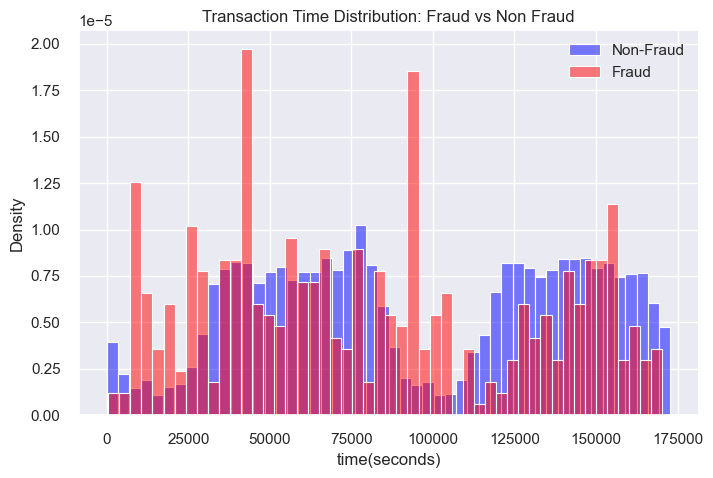

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(non_fraud["Time"], bins=50, color="blue", label="Non-Fraud", stat="density", alpha=0.5)
sns.histplot(fraud["Time"], bins=50, color="red", label="Fraud", stat="density", alpha=0.5)
plt.legend()
plt.title('Transaction Time Distribution: Fraud vs Non Fraud')
plt.xlabel('time(seconds)')
plt.show()


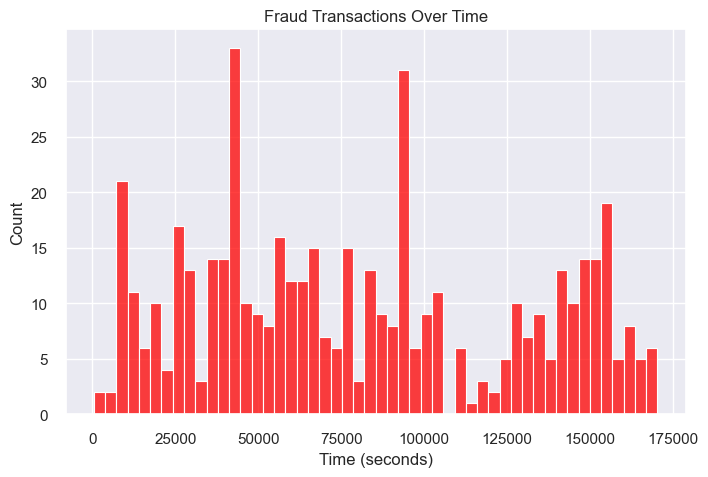

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(fraud["Time"], bins=50, color="red")
plt.title("Fraud Transactions Over Time")
plt.xlabel("Time (seconds)")
plt.show()


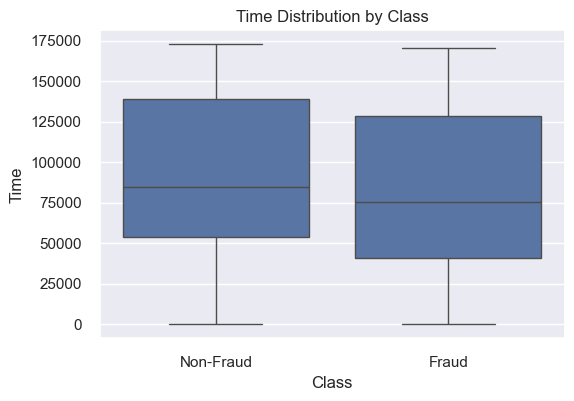

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="Time", data=df)
plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.title("Time Distribution by Class")
plt.show()


Fraudulent transactions are not uniformly distributed over time and appear to occur in bursts.
However, the overall time distribution of fraud and non-fraud transactions overlaps significantly, indicating that time alone is not a strong discriminative feature but may still provide useful context when combined with other variables.

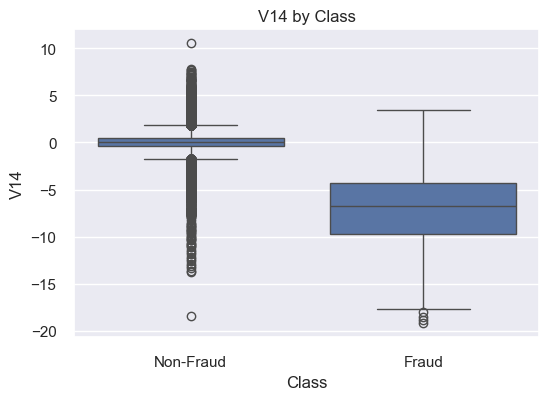

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="V14", data=df)
plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.title("V14 by Class")
plt.show()


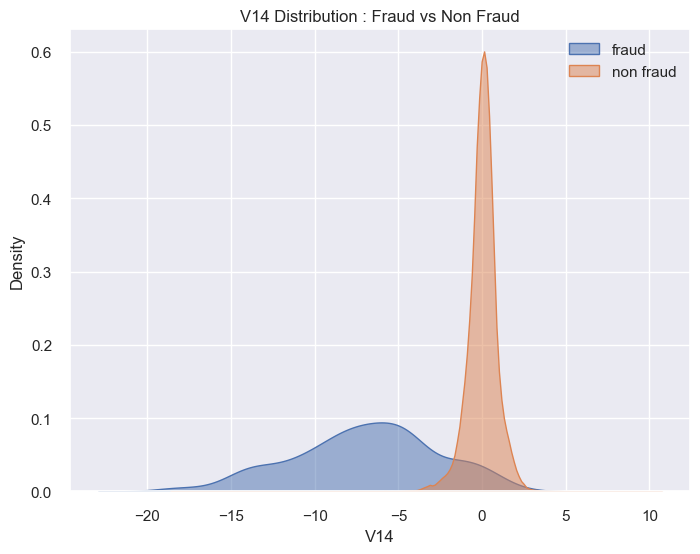

In [38]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=fraud['V14'],fill=True, label='fraud',alpha=0.5)
sns.kdeplot(data=non_fraud['V14'],fill=True, label='non fraud', alpha=0.5)
plt.title('V14 Distribution : Fraud vs Non Fraud')
plt.legend()
plt.show()


In [46]:
df.groupby('Class')['V14'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,0.012064,0.897007,-18.392091,-0.422453,0.051947,0.494104,10.526766
1,492.0,-6.971723,4.278940,-19.214325,-9.692723,-6.729720,-4.282821,3.442422


### Inference from V14 Distribution

- Non-fraud values are tightly centered around 0.
- Fraud values are significantly shifted toward negative values.
- Fraud distribution has larger spread (higher variability).
- Non-fraud shows many outliers, likely due to class imbalance.
- There is clear separation between classes in V14.
- V14 appears to be a strong discriminative feature for fraud detection.
- Overlapping region indicates potential classification uncertainty.

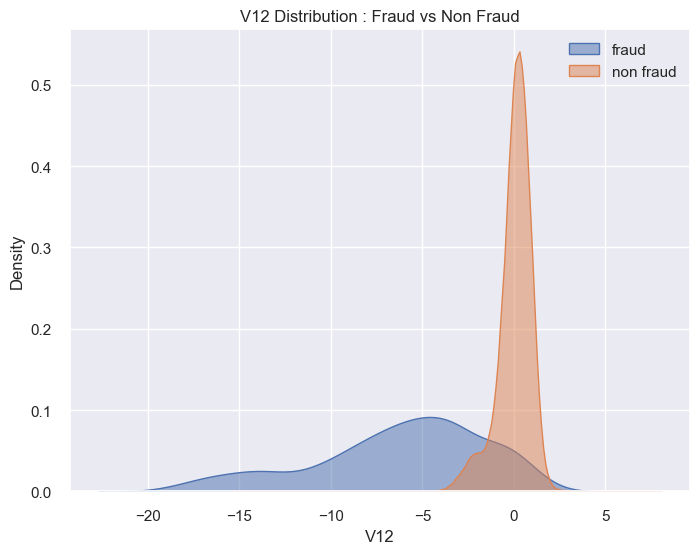

In [75]:

plt.figure(figsize=(8,6))
sns.kdeplot(data=fraud['V12'],fill=True, label='fraud',alpha=0.5)
sns.kdeplot(data=non_fraud['V12'],fill=True, label='non fraud', alpha=0.5)
plt.title('V12 Distribution : Fraud vs Non Fraud')
plt.legend()
plt.show()


V12 also shows noticeable distribution differences between fraud and non-fraud transactions, reinforcing that PCA components contain useful discriminative information.